# Basic Imports

In [1]:
import pandas as pd
import numpy as np

# For charts
import matplotlib.pyplot as plt
import seaborn as sns

# Opening a file

In [2]:
file_path = 'marketing_data.csv'
dict_path = 'marketing_data_dictionary.csv'

# Import the dataset
df = pd.read_csv(file_path)
dict = pd.read_csv(dict_path)

# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Some basic functionality

This is all to look at your stuff, get a base understanding

`df`

`df['col name']` , `df['col name', 'col2 name']`
`df.iloc[n]`

`df.head()`

`df.tail()`

`df.shape`

`df.info()`

`df.describe()`

`df.isnull().sum())`       

`df['Income'].isnull()` , `df[df['Income'].isnull()]`

# Gotta fix missing values

Drop rows with missing values
`df.dropna(inplace=True)`

Replace missing values in 'Income' with the mean of the column
`df['Income'].fillna(df['Income'].mean(), inplace=True)`

# You'd want to split numericals & categoricals

Some stuff doesent work for both numericals & categoricals, so this is how u can split them

In [3]:
# Select numerical columns (integers and floats)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Select categorical columns (object and potentially 'category' dtypes if you've converted any)
categorical_df = df.select_dtypes(include=['object', 'category'])

In [4]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [5]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2240 non-null   object
 1   Marital_Status  2240 non-null   object
 2   Dt_Customer     2240 non-null   object
 3   Country         2240 non-null   object
dtypes: object(4)
memory usage: 70.1+ KB


# Then can kinda do whatever

In [6]:
# Throwing out dates from categorical
categorical_df = categorical_df.drop(columns='Dt_Customer')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2240 non-null   object
 1   Marital_Status  2240 non-null   object
 2   Country         2240 non-null   object
dtypes: object(3)
memory usage: 52.6+ KB


# Gonna create a few functions, can grab these for future use

In [7]:
def visualize_numerical(df):
    for column in df.columns:
        fig, ax = plt.subplots(1, 2, figsize=(14, 4))
        
        # Histogram
        sns.histplot(df[column], bins=30, ax=ax[0], kde=True)
        ax[0].set_title(f'Histogram of {column}')
        
        # Boxplot
        sns.boxplot(x=df[column], ax=ax[1])
        ax[1].set_title(f'Boxplot of {column}')
        
        plt.tight_layout()
        plt.show()

In [8]:
def visualize_categorical(df):
    for column in df.columns:
        plt.figure(figsize=(10, 4))
        
        # Bar chart
        sns.countplot(y=df[column], order = df[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.tight_layout()
        plt.show()

In [9]:
def plot_normalized_distribution_by_target(df, target_column, diff_threshold=0):
    """
    Generate bar plots for each categorical column in the DataFrame, excluding the target column.
    Plots are normalized with respect to the target column, highlighting distributions where
    the difference exceeds a specified threshold.
    
    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the target column to normalize against and exclude from plotting.
    - diff_threshold: The percentage difference threshold for highlighting distributions.
    """
    # Select categorical columns, excluding the target column
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        # Normalizing counts
        x, y = col, target_column
        df_normalized = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()

        # Assuming binary target column with numeric values, convert them to str for visualization
        df_normalized[y] = df_normalized[y].astype(str)
        
        # Plotting
        plt.figure(figsize=(10,4))
        p = sns.barplot(x=x, y='percent', hue=y, data=df_normalized)
        
        # Add labels to the plot
        for rect in p.patches:
            height = rect.get_height()
            p.text(rect.get_x() + rect.get_width() / 2., height, f'{round(height,2)}%', 
                    ha='center', va='bottom')

        plt.title(f'Normalized Distribution of {col} by {target_column}')
        plt.xticks(rotation=90)
        plt.show()

In [10]:
def plot_categorical_distributions(df):
    """
    Generate bar plots for each categorical column in the DataFrame to visualize
    the distribution of categories.

    Parameters:
    - df: DataFrame containing the data.
    """
    for col in df.columns:
        plt.figure(figsize=(10, 4))
        
        # Calculate and plot the distribution of categories
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        
        # Add labels to the plot
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)  # Rotate labels to avoid overlap
        plt.tight_layout()
        plt.show()

In [11]:
def plot_correlation_heatmap(df):
    """
    Generates a heatmap visualizing the correlation matrix of numerical columns in the DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()


# Now lets see the functions above

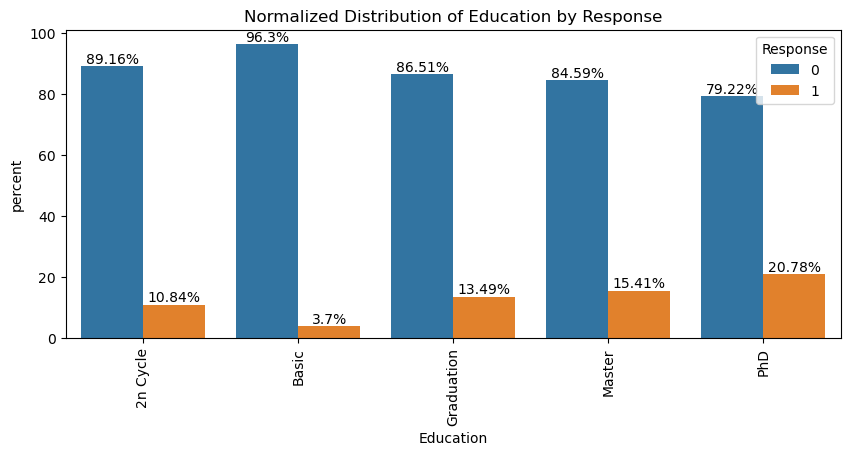

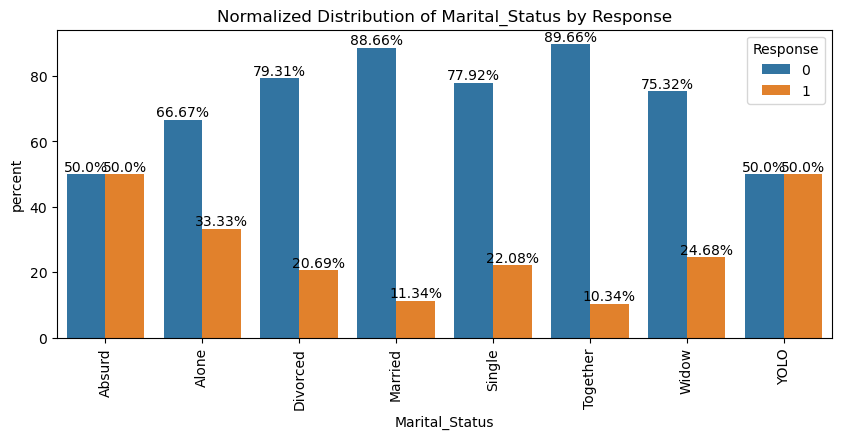

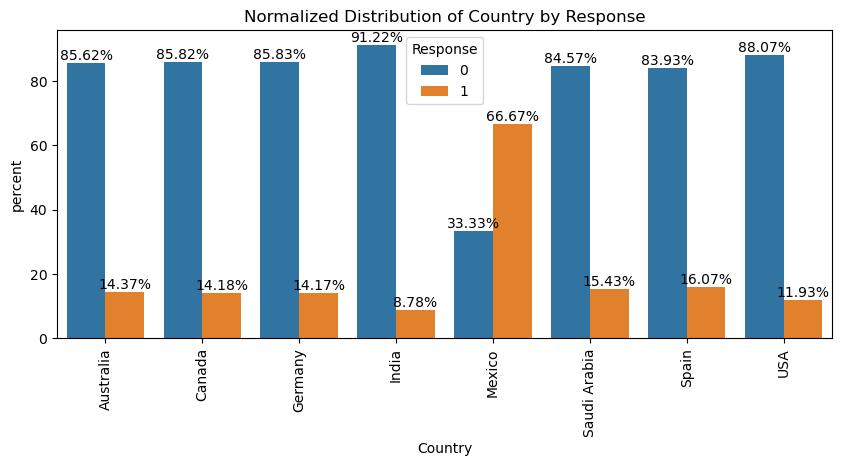

In [12]:
#visualize_numerical(numerical_df)

#visualize_categorical(categorical_df)
#plot_categorical_distributions(categorical_df)

df = df.drop(columns='Dt_Customer')
plot_normalized_distribution_by_target(df, 'Response')

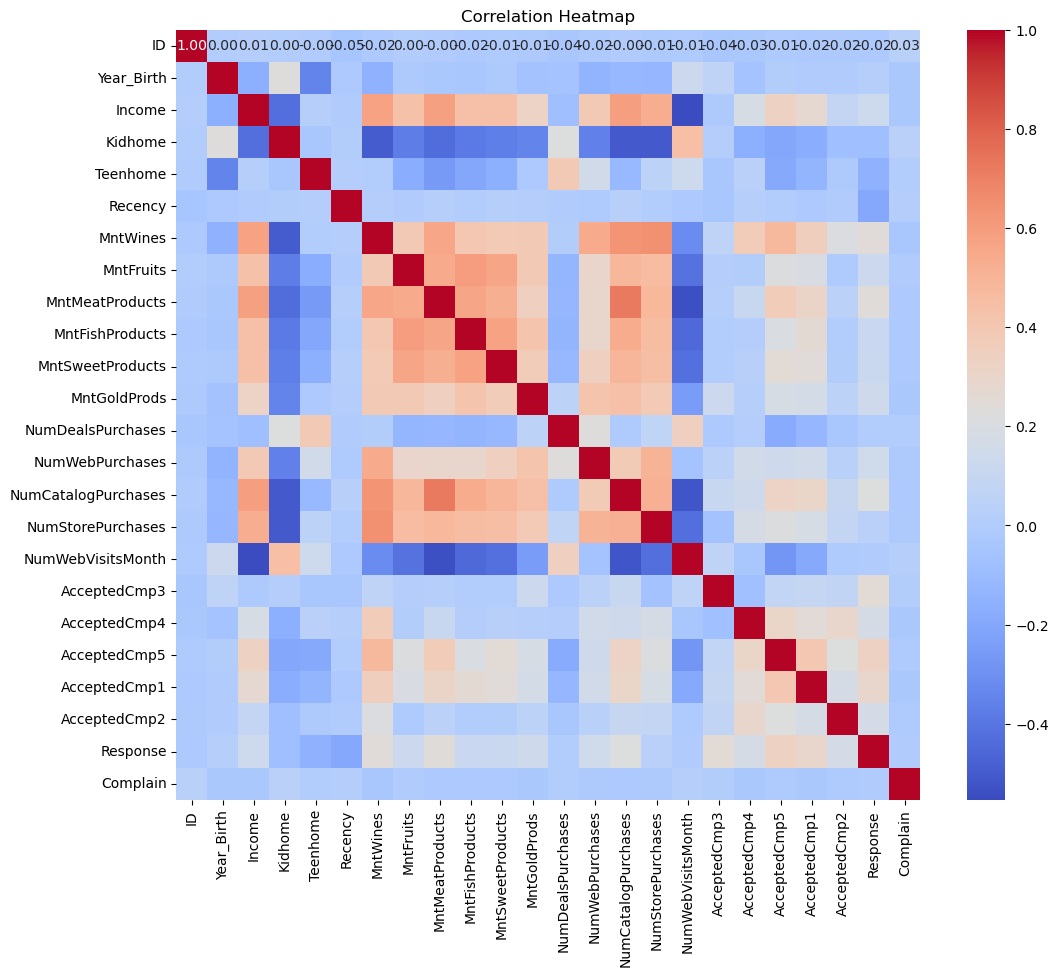

In [13]:
plot_correlation_heatmap(df)

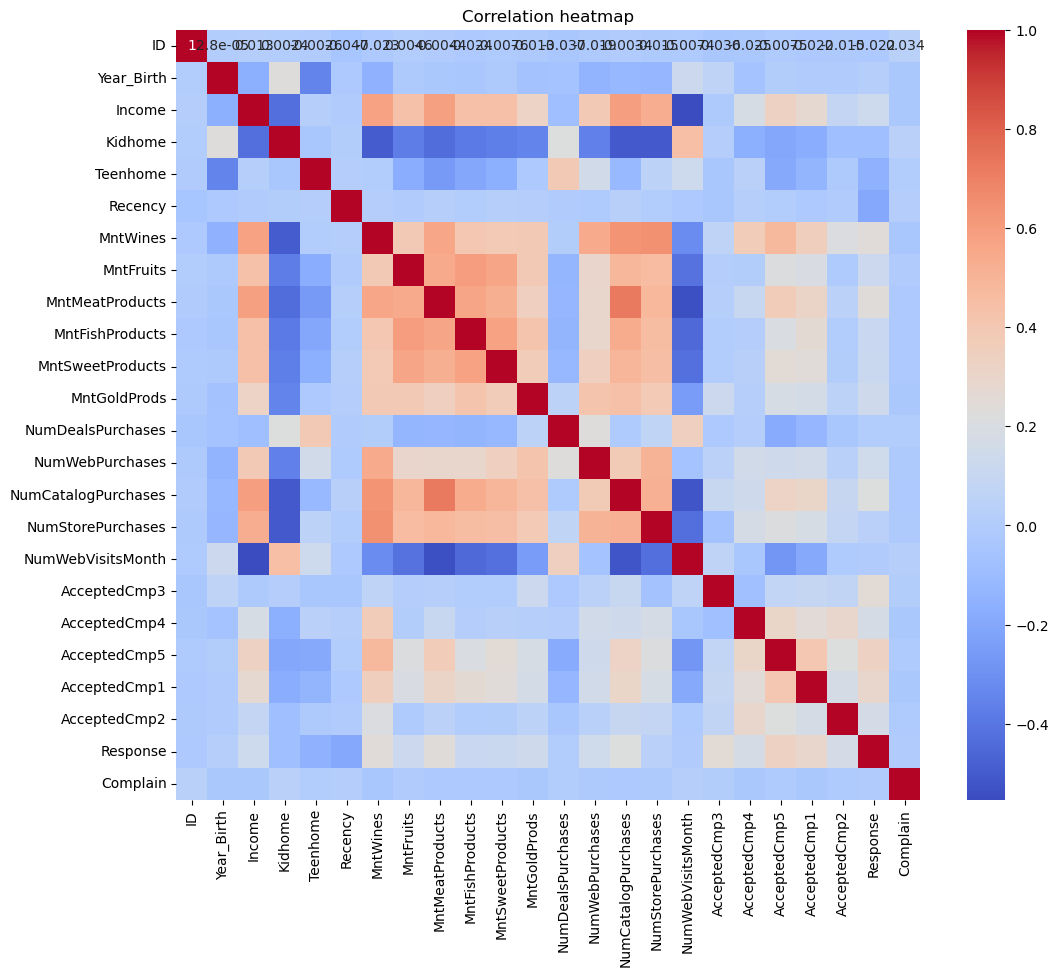

In [16]:
# Correlation heatmap for numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()


In [23]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)


                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.03